This problem looks at two-body interaction under a central force.

First, let's look at a circular orbit. We know the initial condition for $r$ ($r = 36,000$). In a circular orbit, the radius doesn't change, so $\dot{r} = 0$. For convenience, we'll set $\theta = 0$. Now, we just need to determine $\dot{\theta}$. We already know the relationship between $r$ and $\dot{\theta}$ ($l = \mu r^2 \dot{\theta}$). If we take the eccentricity $\epsilon = 0$, we can use the equation $\alpha = r + r \epsilon \cos{\theta}$ to determine $\alpha$, and then use that to find $l = \sqrt{\alpha \mu k}$. We end up finding $\dot{\theta} = \frac{1}{r} \sqrt{\frac{k(1 + \epsilon \cos{\theta})}{\mu r}}$ for all cases. I'll evaluate that when I go to graph my orbit.

Elliptical: $r = 36,000$, $\theta = 0$, and $\dot{\theta} = \frac{1}{r} \sqrt{\frac{k(1 + \epsilon \cos{\theta})}{\mu r}}$, where $0 < \epsilon < 1$. These have the same reasoning as above. We can set $\dot{r} = 0$ because when $r$ is at its minimum (closest approach), the slope of $r$ vs. $t$ is 0.

Parabolic: $r = 36,000$, $\theta = 0$, $\dot{\theta} = \frac{1}{r} \sqrt{\frac{k(1 + \epsilon \cos{\theta})}{\mu r}}$, and $\dot{r} = 0$. The only difference is that $\epsilon = 1$.

Hyperbolic: $r = 36,000$, $\theta = 0$, $\dot{\theta} = \frac{1}{r} \sqrt{\frac{k(1 + \epsilon \cos{\theta})}{\mu r}}$, and $\dot{r} = 0$.

In [25]:
#Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [15]:
#Define constants
G = 6.67*10**(-11)
m_e = 5.972*10**24
r_e = 6367

m_s = 1000
mu = m_e * m_s / (m_e + m_s)

r_s = 36000
k = G * m_e * m_s

In [26]:
#Differential equations to solve
#con means conditions (array of [r, rdot, th, thdot])
#condot is array of [rdot, rdotdot, thdot, thdotdot]
def f(t, con):
    l = mu * con[3] * con[0]**2
    condot = np.empty(4)
    condot[0] = con[1]
    condot[2] = con[3]
    condot[1] = l**2/(mu**2 * con[0]**3) - k/(mu * con[0]**2)
    condot[3] = 2*l*con[1]/(mu * con[0]**3)
    return condot

Now I'll use the RK45 and DOP853 methods to find the orbit with the given initial conditions.

1
0


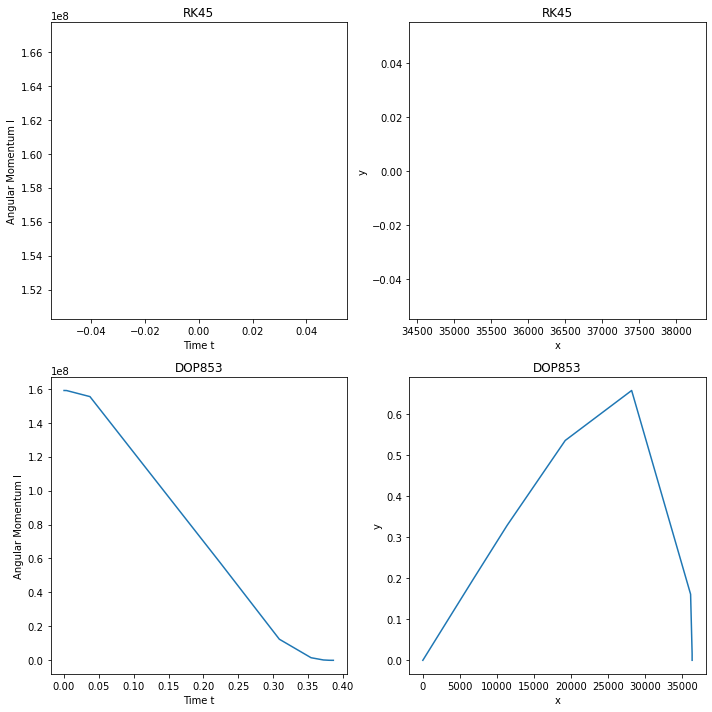

In [49]:
#Initial conditions
IC = np.array([3.64*10**4, 0, 0, 1.2*10**(-4)])
t_span = (0, 6*10**5)
tvals = np.arange(0, 6*10**5, 1)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

#Solve the RK45
RK45_sol = solve_ivp(f, t_span, IC, method='RK45', t_eval=tvals)
t = RK45_sol.t
r = RK45_sol.y[0]
theta = RK45_sol.y[2]
rdot = RK45_sol.y[1]
thdot = RK45_sol.y[3]

print(len(t))
print(t[-1])

#Find l, x, y
l = mu * thdot * r**2
x = r * np.cos(theta)
y = r * np.sin(theta)

ax[0][0].plot(t, l)
ax[0][0].set(xlabel='Time t', ylabel='Angular Momentum l', title='RK45')
ax[0][1].plot(x, y)
ax[0][1].set(xlabel='x', ylabel='y', title='RK45')

#Solve the DOP853
DOP_sol = solve_ivp(f, t_span, IC, method='DOP853')
t = DOP_sol.t
r = DOP_sol.y[0]
theta = DOP_sol.y[2]
rdot = DOP_sol.y[1]
thdot = DOP_sol.y[3]

#Find l, x, y
l = mu * thdot * r**2
x = r * np.cos(theta)
y = r * np.sin(theta)

ax[1][0].plot(t, l)
ax[1][0].set(xlabel='Time t', ylabel='Angular Momentum l', title='DOP853')
ax[1][1].plot(x, y)
ax[1][1].set(xlabel='x', ylabel='y', title='DOP853')

fig.tight_layout()
plt.show()

#God! For the life of me, I can't figure out why it's stopping at such a low value.

<ipython-input-19-451c086b302a>:6: RuntimeWarning: overflow encountered in double_scalars
  l = mu * con[3] * con[0]**2
<ipython-input-19-451c086b302a>:9: RuntimeWarning: overflow encountered in double_scalars
  condot[1] = l**2/(mu**2 * con[0]**3) - k/(mu * con[0]**2)
<ipython-input-19-451c086b302a>:9: RuntimeWarning: invalid value encountered in double_scalars
  condot[1] = l**2/(mu**2 * con[0]**3) - k/(mu * con[0]**2)
<ipython-input-19-451c086b302a>:10: RuntimeWarning: overflow encountered in double_scalars
  condot[3] = 2*l*con[1]/(mu * con[0]**3)
<ipython-input-19-451c086b302a>:10: RuntimeWarning: invalid value encountered in double_scalars
  condot[3] = 2*l*con[1]/(mu * con[0]**3)


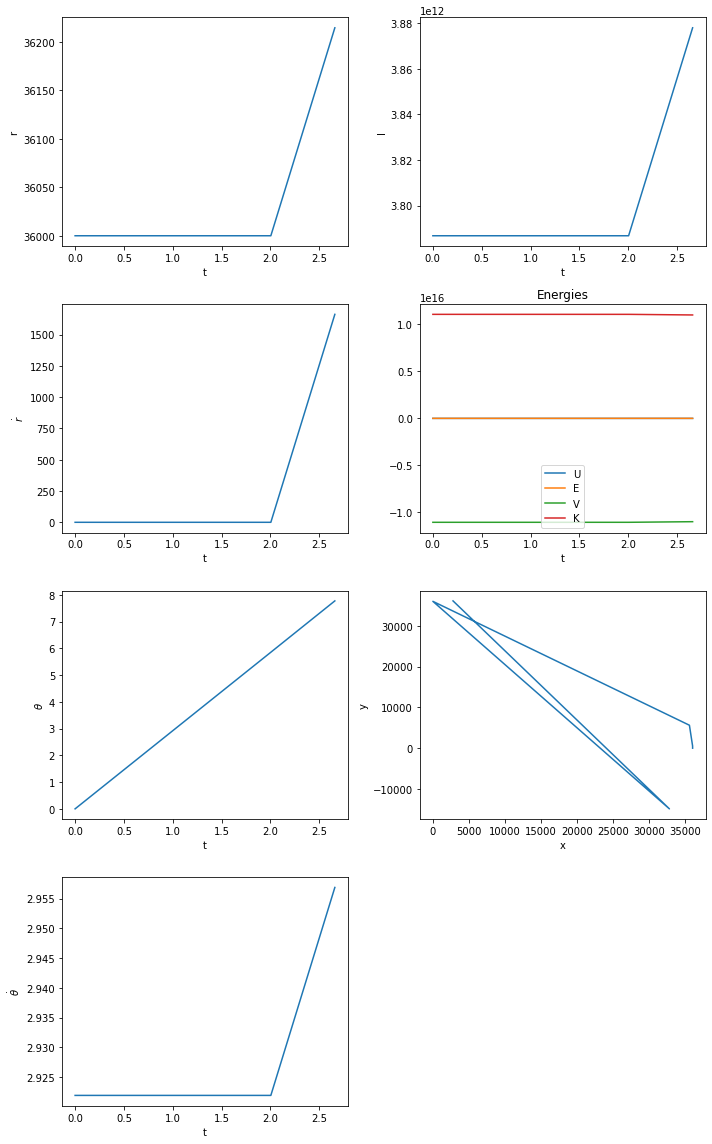

In [24]:
#Circular orbit (epsilon = 0)
def get_thdot(r, ep):
    return np.sqrt(k*(1 + ep)/(mu * r))/r

t_span = (0, 4*10**4)

ep = 0

IC = np.array([36000, 0, 0, get_thdot(36000, ep)])

#Start figure
fig, ax = plt.subplots(4, 2, figsize=(10, 16))
fig.delaxes(ax[3][1])

#Solve IVP
DOP_sol = solve_ivp(f, t_span, IC, method='DOP853')
t = DOP_sol.t
r = DOP_sol.y[0]
theta = DOP_sol.y[2]
rdot = DOP_sol.y[1]
thdot = DOP_sol.y[3]

#Plot graphs
ax[0][0].plot(t, r)
ax[0][0].set(xlabel='t', ylabel='r')

ax[1][0].plot(t, rdot)
ax[1][0].set(xlabel='t', ylabel=r'$\dot{r}$')

ax[2][0].plot(t, theta)
ax[2][0].set(xlabel='t', ylabel=r'$\theta$')

ax[3][0].plot(t, thdot)
ax[3][0].set(xlabel='t', ylabel=r'$\dot{\theta}$')

l = mu * thdot * r**2
ax[0][1].plot(t, l)
ax[0][1].set(xlabel='t', ylabel='l')

U = -k/r
E = mu * k**2 * (ep**2 - 1)/(2 * l**2)
V = U * m_s
K = E - V
ax[1][1].plot(t, U, label='U')
ax[1][1].plot(t, E, label='E')
ax[1][1].plot(t, V, label='V')
ax[1][1].plot(t, K, label='K')
ax[1][1].set(xlabel='t', title='Energies')
ax[1][1].legend(loc='best')

ax[2][1].plot(r*np.cos(theta), r*np.sin(theta))
ax[2][1].set(xlabel='x', ylabel='y')

fig.tight_layout()
plt.show()

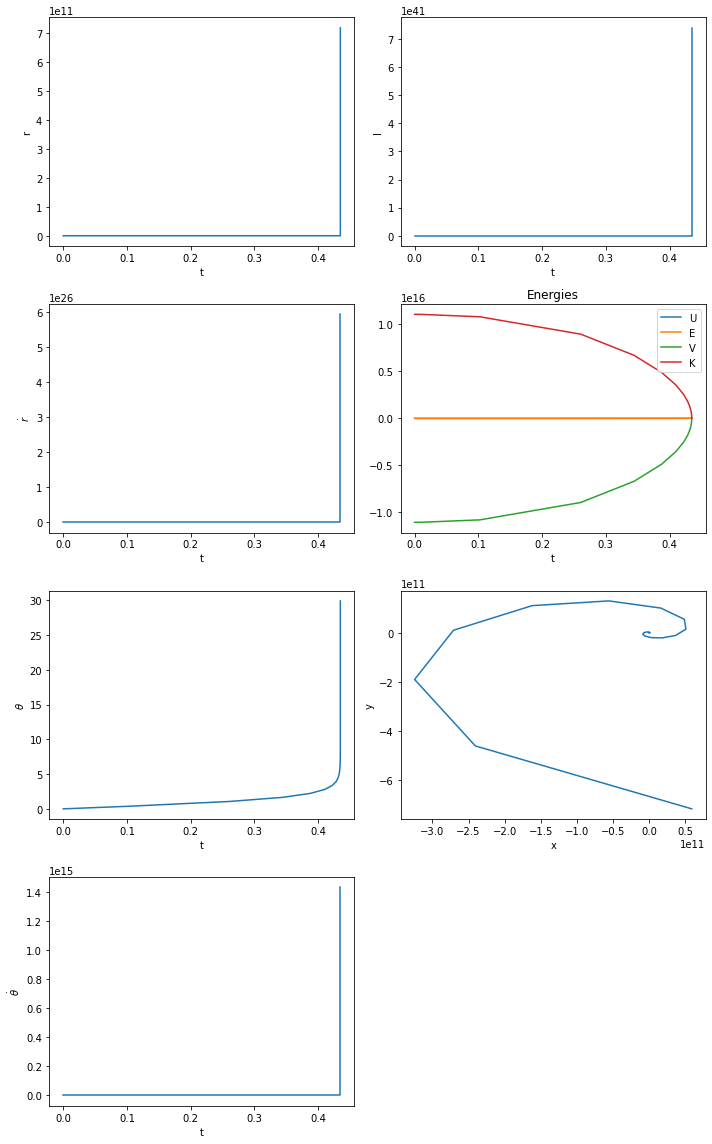

In [28]:
#Elliptical orbit (0 < epsilon < 1)
ep = 0.5

t_span = (0, 4*10**4)

IC = np.array([36000, 0, 0, get_thdot(36000, ep)])

#Start figure
fig, ax = plt.subplots(4, 2, figsize=(10, 16))
fig.delaxes(ax[3][1])

#Solve IVP
DOP_sol = solve_ivp(f, t_span, IC, method='DOP853')
t = DOP_sol.t
r = DOP_sol.y[0]
theta = DOP_sol.y[2]
rdot = DOP_sol.y[1]
thdot = DOP_sol.y[3]

#Plot graphs
ax[0][0].plot(t, r)
ax[0][0].set(xlabel='t', ylabel='r')

ax[1][0].plot(t, rdot)
ax[1][0].set(xlabel='t', ylabel=r'$\dot{r}$')

ax[2][0].plot(t, theta)
ax[2][0].set(xlabel='t', ylabel=r'$\theta$')

ax[3][0].plot(t, thdot)
ax[3][0].set(xlabel='t', ylabel=r'$\dot{\theta}$')

l = mu * thdot * r**2
ax[0][1].plot(t, l)
ax[0][1].set(xlabel='t', ylabel='l')

U = -k/r
E = mu * k**2 * (ep**2 - 1)/(2 * l**2)
V = U * m_s
K = E - V
ax[1][1].plot(t, U, label='U')
ax[1][1].plot(t, E, label='E')
ax[1][1].plot(t, V, label='V')
ax[1][1].plot(t, K, label='K')
ax[1][1].set(xlabel='t', title='Energies')
ax[1][1].legend(loc='best')

ax[2][1].plot(r*np.cos(theta), r*np.sin(theta))
ax[2][1].set(xlabel='x', ylabel='y')

fig.tight_layout()
plt.show()

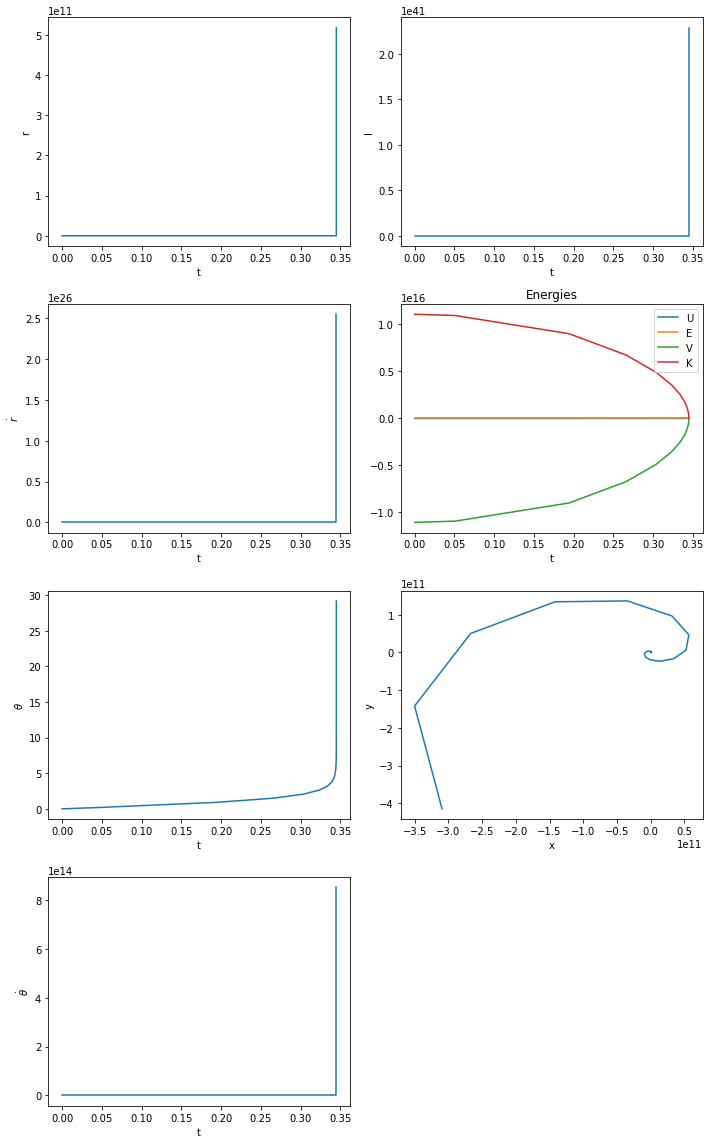

In [29]:
#Parabolic orbit (epsilon = 1)
ep = 1

t_span = (0, 4*10**4)

IC = np.array([36000, 0, 0, get_thdot(36000, ep)])

#Start figure
fig, ax = plt.subplots(4, 2, figsize=(10, 16))
fig.delaxes(ax[3][1])

#Solve IVP
DOP_sol = solve_ivp(f, t_span, IC, method='DOP853')
t = DOP_sol.t
r = DOP_sol.y[0]
theta = DOP_sol.y[2]
rdot = DOP_sol.y[1]
thdot = DOP_sol.y[3]

#Plot graphs
ax[0][0].plot(t, r)
ax[0][0].set(xlabel='t', ylabel='r')

ax[1][0].plot(t, rdot)
ax[1][0].set(xlabel='t', ylabel=r'$\dot{r}$')

ax[2][0].plot(t, theta)
ax[2][0].set(xlabel='t', ylabel=r'$\theta$')

ax[3][0].plot(t, thdot)
ax[3][0].set(xlabel='t', ylabel=r'$\dot{\theta}$')

l = mu * thdot * r**2
ax[0][1].plot(t, l)
ax[0][1].set(xlabel='t', ylabel='l')

U = -k/r
E = mu * k**2 * (ep**2 - 1)/(2 * l**2)
V = U * m_s
K = E - V
ax[1][1].plot(t, U, label='U')
ax[1][1].plot(t, E, label='E')
ax[1][1].plot(t, V, label='V')
ax[1][1].plot(t, K, label='K')
ax[1][1].set(xlabel='t', title='Energies')
ax[1][1].legend(loc='best')

ax[2][1].plot(r*np.cos(theta), r*np.sin(theta))
ax[2][1].set(xlabel='x', ylabel='y')

fig.tight_layout()
plt.show()

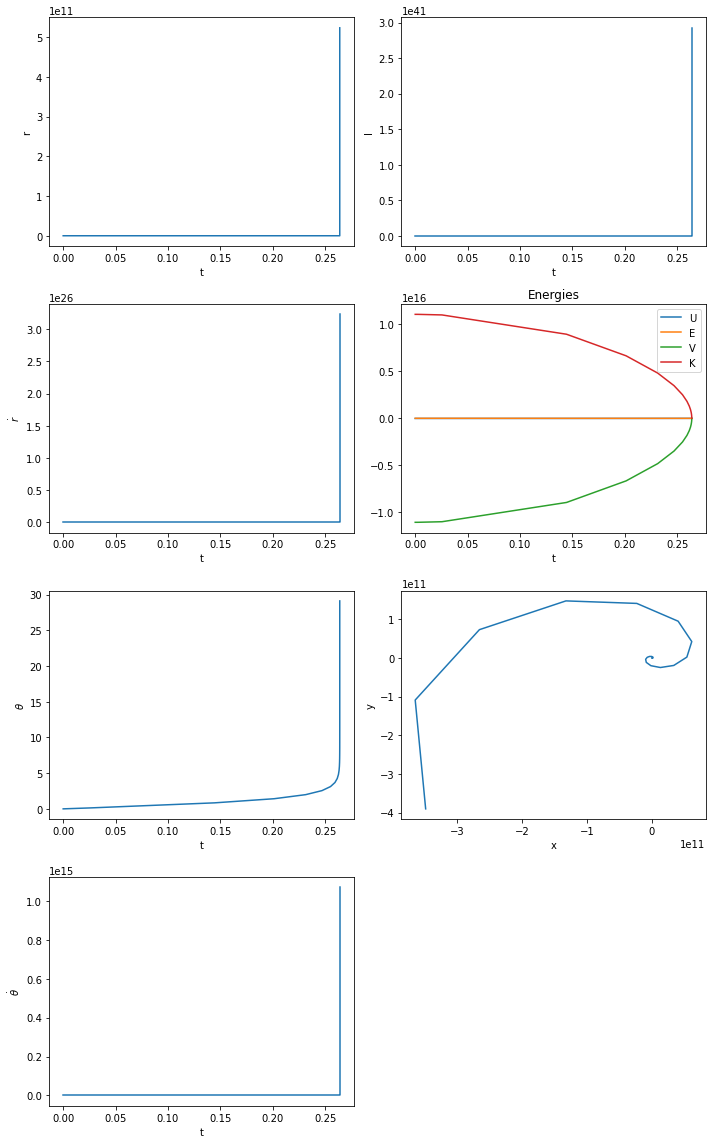

In [30]:
#Hyperbolic orbit (epsilon > 1)
ep = 2

t_span = (0, 4*10**4)

IC = np.array([36000, 0, 0, get_thdot(36000, ep)])

#Start figure
fig, ax = plt.subplots(4, 2, figsize=(10, 16))
fig.delaxes(ax[3][1])

#Solve IVP
DOP_sol = solve_ivp(f, t_span, IC, method='DOP853')
t = DOP_sol.t
r = DOP_sol.y[0]
theta = DOP_sol.y[2]
rdot = DOP_sol.y[1]
thdot = DOP_sol.y[3]

#Plot graphs
ax[0][0].plot(t, r)
ax[0][0].set(xlabel='t', ylabel='r')

ax[1][0].plot(t, rdot)
ax[1][0].set(xlabel='t', ylabel=r'$\dot{r}$')

ax[2][0].plot(t, theta)
ax[2][0].set(xlabel='t', ylabel=r'$\theta$')

ax[3][0].plot(t, thdot)
ax[3][0].set(xlabel='t', ylabel=r'$\dot{\theta}$')

l = mu * thdot * r**2
ax[0][1].plot(t, l)
ax[0][1].set(xlabel='t', ylabel='l')

U = -k/r
E = mu * k**2 * (ep**2 - 1)/(2 * l**2)
V = U * m_s
K = E - V
ax[1][1].plot(t, U, label='U')
ax[1][1].plot(t, E, label='E')
ax[1][1].plot(t, V, label='V')
ax[1][1].plot(t, K, label='K')
ax[1][1].set(xlabel='t', title='Energies')
ax[1][1].legend(loc='best')

ax[2][1].plot(r*np.cos(theta), r*np.sin(theta))
ax[2][1].set(xlabel='x', ylabel='y')

fig.tight_layout()
plt.show()